<a href="https://colab.research.google.com/github/GarimaChopra/AML/blob/master/Project3_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The Heart Disease dataset contains information about 303 individuals. There are 14 columns in the dataset (the last column is the target) The label is 0 (no heart disease) and 1 (heart disease)

In [937]:
# Using Pandas for importing data from file 
import pandas as pd

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sbn

# Using numpy for to operate on multidimentional arrays.
import numpy as np


In [938]:
# Read raw file from github into a dataframe
# epi_r.csv: provides rating to recipe based on various factors
df = pd.read_csv('https://raw.githubusercontent.com/GarimaChopra/AML/main/heart.csv')

In [939]:
#verify if data is loaded
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [940]:
# the size of the dataset
df.shape

(303, 14)

In [941]:
# Statistical information of dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [942]:
#summarize the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


From above analysis we find that data contains no null values and all columns are numeric 

**Problem Statement** : Plot distribution of age and sex for each target class.

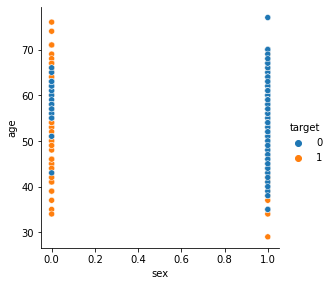

In [943]:
# plotting distribution
sbn.pairplot(df, x_vars=['sex'], y_vars=['age'], height=4, aspect=1, kind='scatter',hue='target')
plt.show()

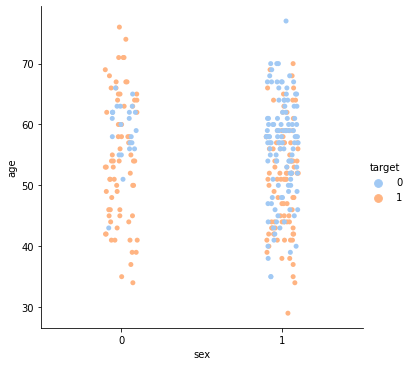

In [944]:
sbn.catplot(data=df, x='sex', y='age',hue='target',palette='pastel')

From the above plot we find that most females(label 0) in age group 30-50 and 65 above  are prone to heart diseases while men are less prone to heart diseases than women

**Problem Statement:** Plot correlation values for all features with respect to the target class.

In [945]:
corr_matrix=df.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

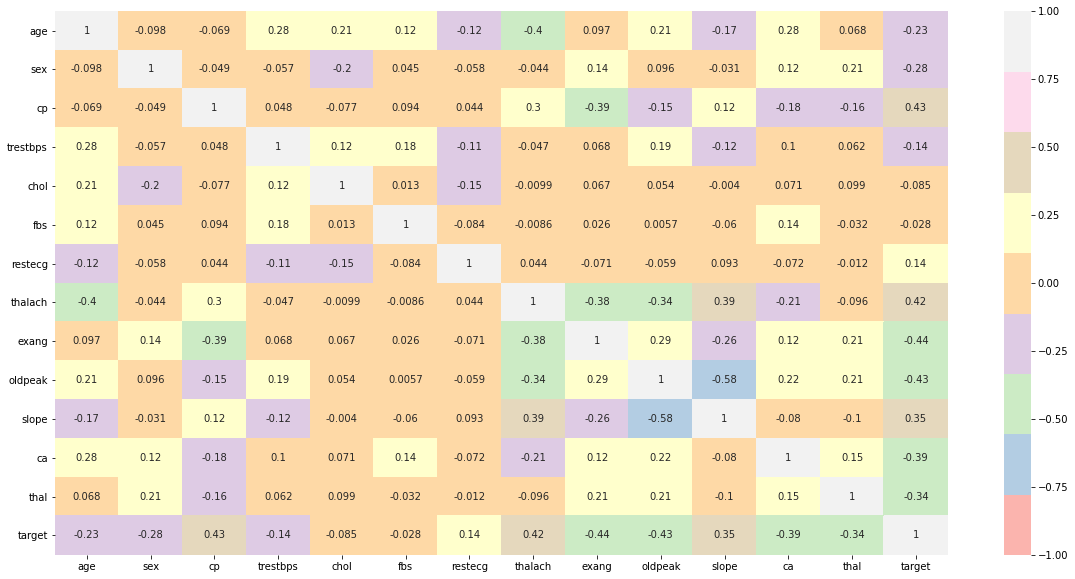

In [946]:
plt.figure(figsize=(20,10))
sbn.heatmap(corr_matrix,annot=True,cmap='Pastel1', vmin=-1, vmax=+1)

From the above plot we find that target has positive correlation with cp,thalach, slope and restecg  i.e. as these value increase chances of heart disease increases

**Problem Statement:** Check for any missing feature values and impute as necessary.

In [947]:
# Show how many null values per column 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

As no column has null value imputer is not needed

**Problem Statement:** Use an 80-20 rule to train and test the following ML models:

*   Logistic Regression
*   Random Forest
*   SGD Classifier






Split Test and Training Data

In [948]:
# Split the data set 
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['target'])
Y = df[['target']] 
# Split the dataset (303 instances) into the training set (80%) and testing (20%)
# random_state Controls the shuffling applied to the data before applying the split. 
# Pass an int for reproducible output across multiple function calls.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)  


In [949]:
X_train.shape,Y_train.shape

((242, 13), (242, 1))

In [950]:
X_test.shape,Y_test.shape

((61, 13), (61, 1))

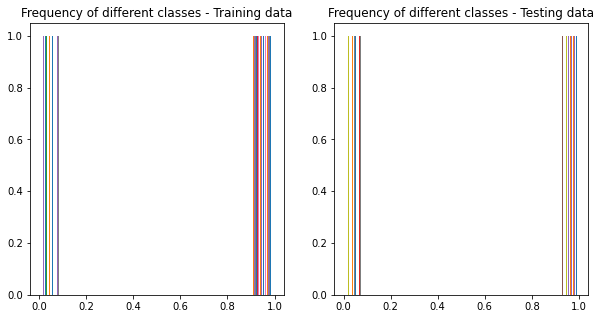

In [951]:
# Find out class distributions in both testing and training datasets.

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(Y_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(Y_test);
plt.title('Frequency of different classes - Testing data');

### Logistic Regression

In [952]:
# Logistic model

from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        solver='lbfgs', 
                        max_iter=1000,
                        verbose=2, # output progress
                        random_state=0
                        )
# Fit the model
lr_classifier.fit(X_train, Y_train)

# Let's see what the classifier has learned
lr_classifier.classes_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


array([0, 1])

In [953]:
# Accuracy scores on the training and testing sets

score1 = round(lr_classifier.score(X_train, Y_train), 2) # training score
score2 = round(lr_classifier.score(X_test, Y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score1, score2))

Training and Testing scores: 0.84, 0.85


In [954]:
# The confusion matrix

from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np

lr_predictions = lr_classifier.predict(X_test)

labels = lr_classifier.classes_

# compute TP, TN, FP, FN values
lr_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
lr_cr = classification_report(y_true=Y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(lr_cm, index=labels, columns=labels)

,0,1
0,21,6
1,3,31


Text(0.5, 48.29999999999998, 'Predicted label')

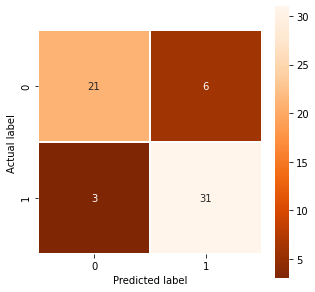

In [955]:
# Visualize the confusion matrix as a heatmap

import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(lr_cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [956]:
# Print the classification report 

print(lr_cr)

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



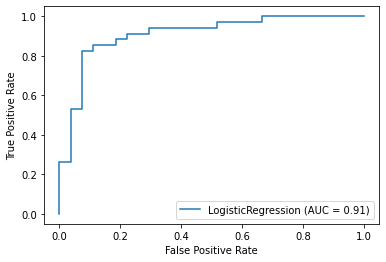

In [957]:
#Plotting ROC Curve
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
rfc_disp = plot_roc_curve(lr_classifier, X_test, Y_test, ax=ax)
plt.show()

### SGD Classifier

In [958]:
# SGD classifier  

from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(max_iter=1000, tol=1e-5,random_state=0)

# Fit the model
sgd_classifier.fit(X_train, Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=1e-05,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [959]:
# Accuracy scores on the training and testing sets

score3 = round(sgd_classifier.score(X_train, Y_train), 2) # training score
score4 = round(sgd_classifier.score(X_test, Y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score3, score4))

Training and Testing scores: 0.60, 0.57


In [960]:
# The confusion matrix

sgd_predictions = sgd_classifier.predict(X_test)

labels = sgd_classifier.classes_

# compute TP, TN, FP, FN values
sgd_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
sgd_cr = classification_report(y_true=Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(sgd_cm, index=labels, columns=labels)

,0,1
0,27,0
1,26,8


Text(0.5, 48.29999999999998, 'Predicted label')

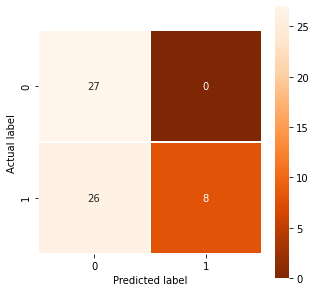

In [961]:
# Visualize the confusion matrix as a heatmap

import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(sgd_cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [962]:
# Print the classification report 

print(sgd_cr)

              precision    recall  f1-score   support

           0       0.51      1.00      0.67        27
           1       1.00      0.24      0.38        34

    accuracy                           0.57        61
   macro avg       0.75      0.62      0.53        61
weighted avg       0.78      0.57      0.51        61



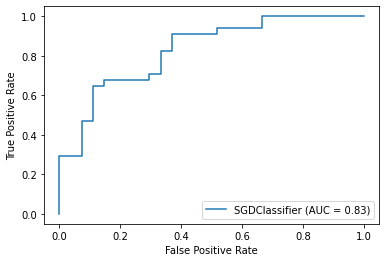

In [963]:
#Plotting ROC Curve
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
rfc_disp = plot_roc_curve(sgd_classifier, X_test, Y_test, ax=ax)
plt.show()

### Random Forest

In [964]:
from sklearn.ensemble import RandomForestClassifier 

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, Y_train) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [965]:
# Accuracy scores on the training and testing sets

score5 = round(rf_classifier.score(X_train, Y_train), 2) # training score
score6 = round(rf_classifier.score(X_test, Y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score5, score6))

Training and Testing scores: 1.00, 0.84


In [966]:
# The confusion matrix

rf_predictions = rf_classifier.predict(X_test)

labels = rf_classifier.classes_

# compute TP, TN, FP, FN values
rf_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
rf_cr = classification_report(y_true=Y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(rf_cm, index=labels, columns=labels)

,0,1
0,21,6
1,4,30


Text(0.5, 48.29999999999998, 'Predicted label')

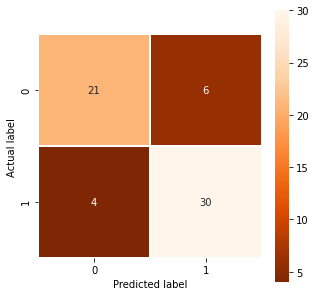

In [967]:
# Visualize the confusion matrix as a heatmap

import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(rf_cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [968]:
# Print the classification report 

print(rf_cr)

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



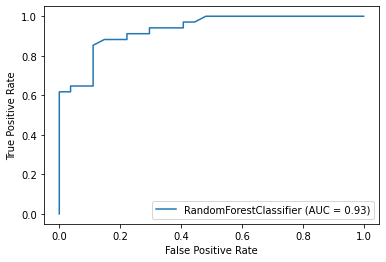

In [969]:
#Plotting ROC Curve
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
rfc_disp = plot_roc_curve(rf_classifier, X_test, Y_test, ax=ax)
plt.show()

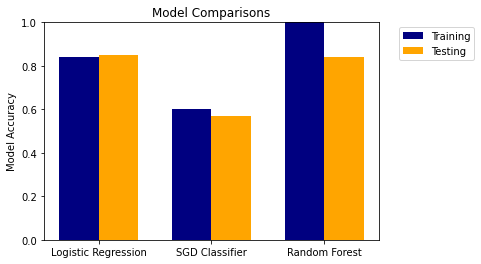

In [970]:
# Summarize the findings for all models

labels = ['Logistic Regression', 'SGD Classifier', 'Random Forest']
training_scores = [score1, score3, score5]
testing_scores =  [score2, score4, score6]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Model Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Model Comparisons')
plt.show()

**Summary:** Side-by-side comparison of the 3 models demonstrates that the Random Forest (RF) model provides the highest classification accuracy on both the training and testing cases. However, such a high classification accuracy on the training set is indicative of high bias.


**Problem Statement:** Verify whether or not scaling the data helps improve model accuracies.

### Standard Scalar

In [971]:
# Standard scaling 
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()
scaler_standard.fit(X)
scaled_data = scaler_standard.transform(X)
scaled_data


# turn to data frame
scaled_data_ss = pd.DataFrame(scaled_data_ss, columns=X.columns, index=X.index);

# describe standard scale
scaled_data_ss.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,3.151128e-17,1.978615e-17,-6.373248e-17,-1.236635e-17,2.949602e-17,-3.664102e-19,6.815230e-17,1.348390e-16,-5.203025e-16,-3.140136e-16,1.941974e-16,5.488825e-16,4.305320e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-1.468418e+00,-9.385146e-01,-2.148802e+00,-2.324160e+00,-4.176345e-01,-1.005832e+00,-3.439267e+00,-6.966305e-01,-8.968617e-01,-2.274579e+00,-7.144289e-01,-3.784824e+00
25%,-7.572802e-01,-1.468418e+00,-9.385146e-01,-6.638668e-01,-6.814943e-01,-4.176345e-01,-1.005832e+00,-7.061105e-01,-6.966305e-01,-8.968617e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01
50%,6.988599e-02,6.810052e-01,3.203122e-02,-9.273778e-02,-1.210553e-01,-4.176345e-01,8.989622e-01,1.466343e-01,-6.966305e-01,-2.067053e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01
75%,7.316189e-01,6.810052e-01,1.002577e+00,4.783913e-01,5.456738e-01,-4.176345e-01,8.989622e-01,7.151309e-01,1.435481e+00,4.834512e-01,9.763521e-01,2.650822e-01,1.123029e+00
max,2.496240e+00,6.810052e-01,1.973123e+00,3.905165e+00,6.140401e+00,2.394438e+00,2.803756e+00,2.289429e+00,1.435481e+00,4.451851e+00,9.763521e-01,3.203615e+00,1.123029e+00


In [972]:
# Split the data set 
from sklearn.model_selection import train_test_split


# Spliiting scaled data
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data_ss, Y, test_size=0.2,  random_state = 0)

In [973]:
X_train.shape,Y_train.shape

((242, 13), (242, 1))

### Logistic Model -standard scaling

In [974]:
# Fit the model
lr_classifier.fit(X_train, Y_train)

# Let's see what the classifier has learned
lr_classifier.classes_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


array([0, 1])

In [975]:
# Accuracy scores on the training and testing sets

score1 = round(lr_classifier.score(X_train, Y_train), 2) # training score
score2 = round(lr_classifier.score(X_test, Y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score1, score2))

Training and Testing scores: 0.84, 0.85


In [976]:
# The confusion matrix

from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np

lr_predictions = lr_classifier.predict(X_test)

labels = lr_classifier.classes_

# compute TP, TN, FP, FN values
lr_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
lr_cr = classification_report(y_true=Y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(lr_cm, index=labels, columns=labels)

,0,1
0,21,6
1,3,31


SGD- Standard Scaling

In [977]:
# Fit the model
sgd_classifier.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=1e-05,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [978]:
# Accuracy scores on the training and testing sets

score3 = round(sgd_classifier.score(X_train, Y_train), 2) # training score
score4 = round(sgd_classifier.score(X_test, Y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score3, score4))

Training and Testing scores: 0.82, 0.85


In [979]:
# The confusion matrix

sgd_predictions = sgd_classifier.predict(X_test)

labels = sgd_classifier.classes_

# compute TP, TN, FP, FN values
sgd_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
sgd_cr = classification_report(y_true=Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(sgd_cm, index=labels, columns=labels)

,0,1
0,22,5
1,4,30


Random Forest-Standard Scaling

In [980]:
# Fit the model
rf_classifier.fit(X_train, Y_train) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [981]:
# Accuracy scores on the training and testing sets

score5 = round(rf_classifier.score(X_train, Y_train), 2) # training score
score6 = round(rf_classifier.score(X_test, Y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score5, score6))

Training and Testing scores: 1.00, 0.85


In [982]:
# The confusion matrix

rf_predictions = rf_classifier.predict(X_test)

labels = rf_classifier.classes_

# compute TP, TN, FP, FN values
rf_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
rf_cr = classification_report(y_true=Y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(rf_cm, index=labels, columns=labels)

,0,1
0,22,5
1,4,30


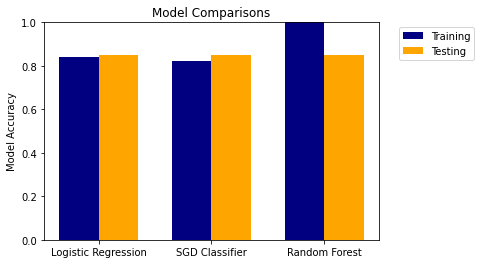

In [983]:
# Summarize the findings for all models

labels = ['Logistic Regression', 'SGD Classifier', 'Random Forest']
training_scores = [score1, score3, score5]
testing_scores =  [score2, score4, score6]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Model Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Model Comparisons')
plt.show()

###  Min Max Scaler 

In [984]:
# Min Max scaling 
from sklearn.preprocessing import MinMaxScaler
scaler_MM= MinMaxScaler()
scaler_MM.fit(X)
scaled_data_minmax = scaler_MM.transform(X)
scaled_data_minmax


# turn to data frame
scaled_data_mm = pd.DataFrame(scaled_data_minmax, columns=X.columns, index=X.index);

# describe standard scale
scaled_data_mm.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.322332,0.354941,0.274575,0.148515,0.264026,0.600358,0.326733,0.167678,0.699670,0.182343,0.771177
std,0.189210,0.466011,0.344017,0.165454,0.118335,0.356198,0.262930,0.174849,0.469794,0.187270,0.308113,0.255652,0.204092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.500000,0.000000,0.666667
50%,0.541667,1.000000,0.333333,0.339623,0.260274,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667
75%,0.666667,1.000000,0.666667,0.433962,0.339041,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [985]:
# Split the data set 
from sklearn.model_selection import train_test_split


# Spliiting scaled data
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data_mm, Y, test_size=0.2,  random_state = 0)

In [986]:
X_train.shape,Y_train.shape

((242, 13), (242, 1))

Logistic Model - min max scaling

In [987]:
# Fit the model
lr_classifier.fit(X_train, Y_train)

# Let's see what the classifier has learned
lr_classifier.classes_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


array([0, 1])

In [988]:
# Accuracy scores on the training and testing sets

score1 = round(lr_classifier.score(X_train, Y_train), 2) # training score
score2 = round(lr_classifier.score(X_test, Y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score1, score2))

Training and Testing scores: 0.83, 0.84


In [989]:
# The confusion matrix

from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np

lr_predictions = lr_classifier.predict(X_test)

labels = lr_classifier.classes_

# compute TP, TN, FP, FN values
lr_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
lr_cr = classification_report(y_true=Y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(lr_cm, index=labels, columns=labels)

,0,1
0,20,7
1,3,31


SGC- Min Max Scaling

In [990]:
# Fit the model
sgd_classifier.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=1e-05,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [991]:
# Accuracy scores on the training and testing sets

score3 = round(sgd_classifier.score(X_train, Y_train), 2) # training score
score4 = round(sgd_classifier.score(X_test, Y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score3, score4))

Training and Testing scores: 0.68, 0.56


In [992]:
# The confusion matrix

sgd_predictions = sgd_classifier.predict(X_test)

labels = sgd_classifier.classes_

# compute TP, TN, FP, FN values
sgd_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
sgd_cr = classification_report(y_true=Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(sgd_cm, index=labels, columns=labels)

,0,1
0,26,1
1,26,8


Random Forest-Min Max Scaling

In [993]:
# Fit the model
rf_classifier.fit(X_train, Y_train) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [994]:
# Accuracy scores on the training and testing sets

score5 = round(rf_classifier.score(X_train, Y_train), 2) # training score
score6 = round(rf_classifier.score(X_test, Y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score5, score6))

Training and Testing scores: 1.00, 0.85


In [995]:
# The confusion matrix

rf_predictions = rf_classifier.predict(X_test)

labels = rf_classifier.classes_

# compute TP, TN, FP, FN values
rf_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
rf_cr = classification_report(y_true=Y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(rf_cm, index=labels, columns=labels)

,0,1
0,22,5
1,4,30


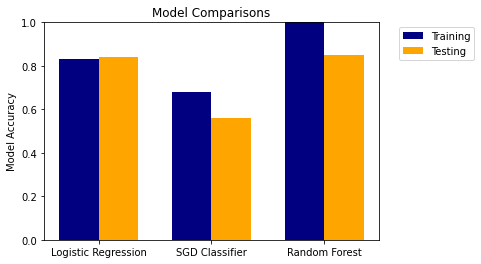

In [996]:
# Summarize the findings for all models

labels = ['Logistic Regression', 'SGD Classifier', 'Random Forest']
training_scores = [score1, score3, score5]
testing_scores =  [score2, score4, score6]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Model Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Model Comparisons')
plt.show()

On scaling the data using Min Max scalar , performance of SGD model is reduced considerably.
Performace remains almost similar for Logistic ,SGD and Random model when using standard scaling 

**Summary**

Random forest outperforms for above dataset and its performance is consistent across irrespective of scaling the dataset. As the training accuracy for Random Forest is 1, this shows that the training dataset is overfitting the model. When the dataset was scaled, the SGD model's performance dropped .
